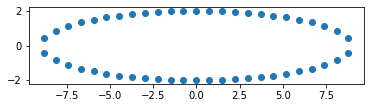

In [69]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from sklearn.linear_model import SGDRegressor
import numpy as np
import scipy as sp
import scipy.optimize

def angles_in_ellipse(num,a,b):
    assert(num > 0)
    assert(a < b)
    angles = 2 * np.pi * np.arange(num) / num
    if a != b:
        e = (1.0 - a ** 2.0 / b ** 2.0) ** 0.5
        tot_size = sp.special.ellipeinc(2.0 * np.pi, e)
        arc_size = tot_size / num
        arcs = np.arange(num) * arc_size
        res = sp.optimize.root(
            lambda x: (sp.special.ellipeinc(x, e) - arcs), angles)
        angles = res.x 
    return angles
a = 2
b = 9
n = 50

phi = angles_in_ellipse(n, a, b)
e = (1.0 - a ** 2.0 / b ** 2.0) ** 0.5
arcs = sp.special.ellipeinc(phi, e)

fig = plt.figure()
ax = fig.gca()
ax.axes.set_aspect('equal')
ax.scatter(b * np.sin(phi), a * np.cos(phi))
plt.show()

In [70]:
X= b * np.sin(phi)
Y= a * np.cos(phi)

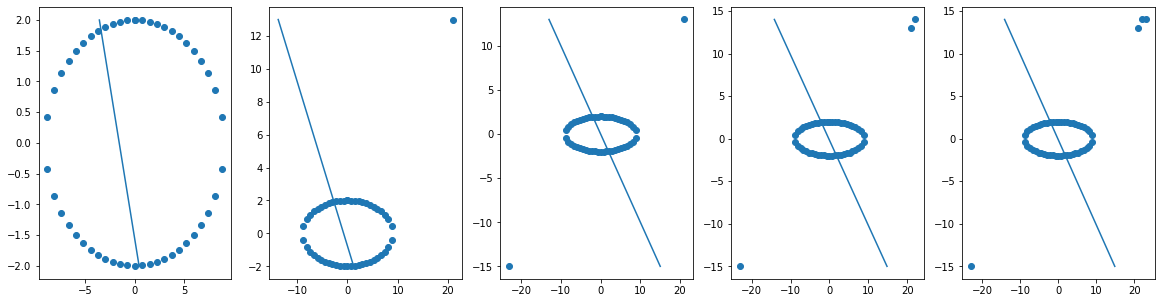

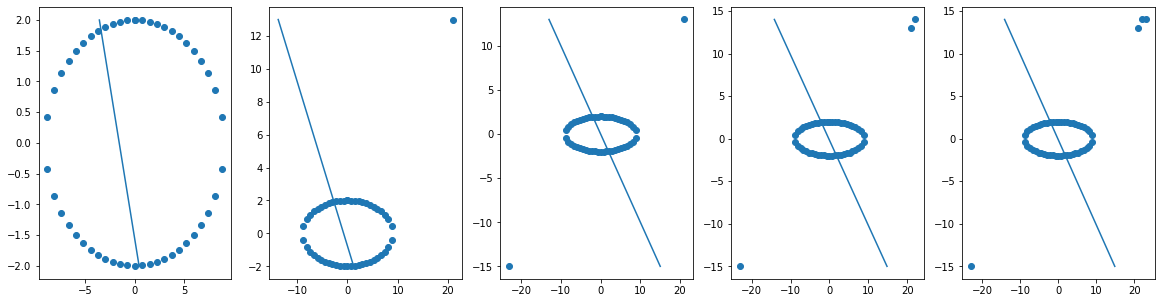

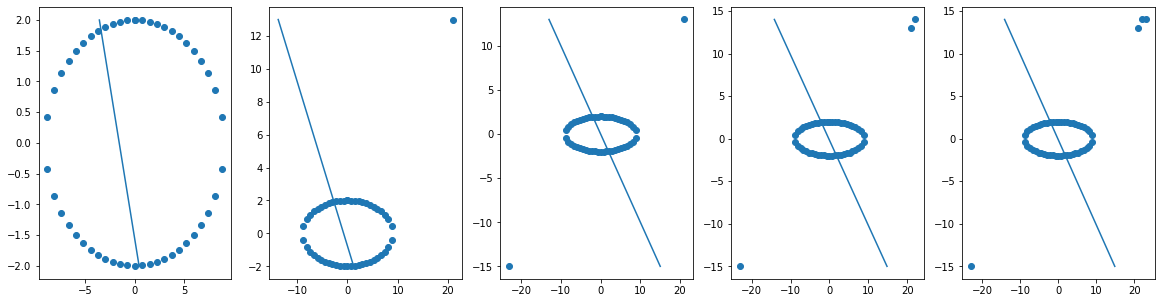

In [118]:
from sklearn import linear_model
def draw_line(coef,intercept, mi, ma):
    points=np.array([[(((-coef)*mi - intercept)/(coef)), mi],[(((-coef)*ma - intercept)/(coef)), ma]])
    plt.plot(points[:,0], points[:,1])
alpha=[0.0001, 1, 100]
outliers = [(0,2),(21, 13), (-23, -15), (22,14), (23, 14)] 
x2=[];y2=[]
for i in range(len(outliers)):
    x2.append(outliers[i][0])
    y2.append(outliers[i][1])
for i in alpha:
    A = X
    B = Y
    plt.figure(figsize=(20,5))
    for j,k in enumerate(outliers):
        plt.subplot(1, 5, j+1)
        x = np.insert(A,-1,x2[0:j+1]).reshape(-1,1)
        y = np.insert(B,-1,y2[0:j+1])
        clf = linear_model.SGDRegressor(eta0=0.001, alpha=0.001, loss='squared_loss', random_state=15, penalty='l2', tol=1e-3, verbose=False, learning_rate='constant',max_iter=500)
        clf.fit(X=x,y=y)
        plt.scatter(x,y)
        draw_line(clf.coef_,clf.intercept_,y.min() , y.max())
    plt.show()
        
    
        